In [3]:
# import dependencies
import random 
import pandas as pd 
import time 
from datetime import datetime
import requests
import json
import seaborn as sns 
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
import openweathermapy as owm
from api_keys import api_key

In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 
cities = []

while len(cities)<600:
    lats = (random.choice(range(-90,90))) 
    lngs = (random.choice(range(-180,180))) 
    city = citipy.nearest_city(lats,lngs).city_name 
    if city not in cities:
        cities.append(city)

len(cities)

600

In [5]:
# setting up url dictionaries
settings = {"units": "imperial", "appid": api_key}

# Setting API calls
cities_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

cities_df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


In [6]:
count = 1 
sets = 1 
index = 0 
err = 0


base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
print(f'Beginning Data Retrieval')
print("--------------------------")

for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{base_url}{city1}&units=imperial&APPID={api_key}')
        response = requests.get(base_url)
        result = owm.get_current(city, **settings)
        cities_df.set_value(index, "City", result["name"])
        cities_df.set_value(index, "Cloudiness", result("clouds.all"))
        cities_df.set_value(index, "Country", result("sys.country"))
        cities_df.set_value(index, "Date", result("dt"))
        cities_df.set_value(index, "Max Temp", result("main.temp_max"))
        cities_df.set_value(index, "Wind Speed", result("wind.speed"))
        cities_df.set_value(index, "Lat", result("coord.lat"))
        cities_df.set_value(index, "Lng", result("coord.lon"))
        cities_df.set_value(index, "Humidity", result("main.humidity"))

        
        index = index +1 
    except :
        print('City not found. Skipping...')
        err= err+1
    
    
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        count = 1 
        sets = sets+1

        

print("--------------------------")
print(f'Data Retrieval Complete ')
print("--------------------------")


Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | troy
http://api.openweathermap.org/data/2.5/weather?q=troy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f


/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. 

Processing Record 2 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 3 of Set 1 | gulshat
http://api.openweathermap.org/data/2.5/weather?q=gulshat&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto%20ayora&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 5 of Set 1 | biltine
http://api.openweathermap.org/data/2.5/weather?q=biltine&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 6 of Set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 7 of Set 1 | gorno-chuyskiy
http://api.openweathermap.org/data/2.5/weather?q=gorno-chuyskiy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing

Processing Record 4 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 5 of Set 2 | caravelas
http://api.openweathermap.org/data/2.5/weather?q=caravelas&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 6 of Set 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya%20guba&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 7 of Set 2 | hovd
http://api.openweathermap.org/data/2.5/weather?q=hovd&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 8 of Set 2 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 9 of Set 2 | chuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 10 of 

Processing Record 6 of Set 3 | libenge
http://api.openweathermap.org/data/2.5/weather?q=libenge&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 7 of Set 3 | wellington
http://api.openweathermap.org/data/2.5/weather?q=wellington&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 8 of Set 3 | saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 9 of Set 3 | leh
http://api.openweathermap.org/data/2.5/weather?q=leh&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 10 of Set 3 | sabinov
http://api.openweathermap.org/data/2.5/weather?q=sabinov&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 11 of Set 3 | evensk
http://api.openweathermap.org/data/2.5/weather?q=evensk&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 12 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?q=provi

Processing Record 9 of Set 4 | marawi
http://api.openweathermap.org/data/2.5/weather?q=marawi&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 10 of Set 4 | geraldton
http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 11 of Set 4 | mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 12 of Set 4 | kieta
http://api.openweathermap.org/data/2.5/weather?q=kieta&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 13 of Set 4 | urfa
http://api.openweathermap.org/data/2.5/weather?q=urfa&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 14 of Set 4 | gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 15 of Set 4 | saquena
http://api.openweathermap.org/data/2.5/weathe

Processing Record 12 of Set 5 | shirokiy
http://api.openweathermap.org/data/2.5/weather?q=shirokiy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 13 of Set 5 | skibbereen
http://api.openweathermap.org/data/2.5/weather?q=skibbereen&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 14 of Set 5 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 15 of Set 5 | olmos
http://api.openweathermap.org/data/2.5/weather?q=olmos&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 16 of Set 5 | havelock
http://api.openweathermap.org/data/2.5/weather?q=havelock&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 17 of Set 5 | nouakchott
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 18 of Set 5 | souillac
http://api.openweathermap.org/data/2.5/

Processing Record 14 of Set 6 | meyungs
http://api.openweathermap.org/data/2.5/weather?q=meyungs&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 15 of Set 6 | kailua
http://api.openweathermap.org/data/2.5/weather?q=kailua&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 16 of Set 6 | hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 17 of Set 6 | storforshei
http://api.openweathermap.org/data/2.5/weather?q=storforshei&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 18 of Set 6 | clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde%20river&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 19 of Set 6 | catalao
http://api.openweathermap.org/data/2.5/weather?q=catalao&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 20 of Set 6 | oranjemund
http:

City not found. Skipping...
Processing Record 17 of Set 7 | tobane
http://api.openweathermap.org/data/2.5/weather?q=tobane&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 18 of Set 7 | nuuk
http://api.openweathermap.org/data/2.5/weather?q=nuuk&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 19 of Set 7 | coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 20 of Set 7 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 21 of Set 7 | ternate
http://api.openweathermap.org/data/2.5/weather?q=ternate&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 22 of Set 7 | ayan
http://api.openweathermap.org/data/2.5/weather?q=ayan&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 23 of Set 7 | cururupu
http://api.openweathermap.org/data/

Processing Record 20 of Set 8 | cochrane
http://api.openweathermap.org/data/2.5/weather?q=cochrane&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 21 of Set 8 | nadym
http://api.openweathermap.org/data/2.5/weather?q=nadym&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 22 of Set 8 | udankudi
http://api.openweathermap.org/data/2.5/weather?q=udankudi&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 23 of Set 8 | sinkat
http://api.openweathermap.org/data/2.5/weather?q=sinkat&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 24 of Set 8 | hearst
http://api.openweathermap.org/data/2.5/weather?q=hearst&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 25 of Set 8 | lima
http://api.openweathermap.org/data/2.5/weather?q=lima&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 26 of Set 8 | rio do sul
http://api.openweathermap.org/dat

Processing Record 22 of Set 9 | vardo
http://api.openweathermap.org/data/2.5/weather?q=vardo&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 23 of Set 9 | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?q=santa%20vitoria%20do%20palmar&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 24 of Set 9 | vyazemskiy
http://api.openweathermap.org/data/2.5/weather?q=vyazemskiy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 25 of Set 9 | acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 26 of Set 9 | burica
http://api.openweathermap.org/data/2.5/weather?q=burica&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 27 of Set 9 | bubaque
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 28 of Se

Processing Record 25 of Set 10 | samagaltay
http://api.openweathermap.org/data/2.5/weather?q=samagaltay&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 26 of Set 10 | sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 27 of Set 10 | dogondoutchi
http://api.openweathermap.org/data/2.5/weather?q=dogondoutchi&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 28 of Set 10 | shahrud
http://api.openweathermap.org/data/2.5/weather?q=shahrud&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 29 of Set 10 | broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken%20hill&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 30 of Set 10 | ranong
http://api.openweathermap.org/data/2.5/weather?q=ranong&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 31 of Set 10 | requena
http://api.openweathermap.o

Processing Record 28 of Set 11 | hualmay
http://api.openweathermap.org/data/2.5/weather?q=hualmay&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 29 of Set 11 | kitob
http://api.openweathermap.org/data/2.5/weather?q=kitob&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 30 of Set 11 | duminichi
http://api.openweathermap.org/data/2.5/weather?q=duminichi&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 31 of Set 11 | haapiti
http://api.openweathermap.org/data/2.5/weather?q=haapiti&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 32 of Set 11 | grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand%20gaube&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 33 of Set 11 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 34 of Set 11 | porbandar
http://api.openweathermap.org/dat

Processing Record 31 of Set 12 | msanga
http://api.openweathermap.org/data/2.5/weather?q=msanga&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 32 of Set 12 | san quintin
http://api.openweathermap.org/data/2.5/weather?q=san%20quintin&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 33 of Set 12 | soyo
http://api.openweathermap.org/data/2.5/weather?q=soyo&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 34 of Set 12 | asau
http://api.openweathermap.org/data/2.5/weather?q=asau&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 35 of Set 12 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
Processing Record 36 of Set 12 | skalistyy
http://api.openweathermap.org/data/2.5/weather?q=skalistyy&units=imperial&APPID=a12c4170af13597cd04db86c5c6ecb6f
City not found. Skipping...
Processing Record 37 of Se

In [7]:
# Display the count of cities with weather data
cities_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Max Temp      534
Wind Speed    534
Lat           534
Lng           534
Humidity      534
dtype: int64

In [8]:
# Export to a csv
cities_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the DataFrame
cities_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Troy,40,US,1554782770,54,4.79,42.73,-73.69,87
1,Albany,40,US,1554782644,54,4.79,42.65,-73.75,87
2,Puerto Ayora,0,EC,1554782490,78.01,7.65,-0.74,-90.35,93
3,Biltine,0,TD,1554782789,66.88,2.62,14.53,20.93,56
4,Longyearbyen,80,NO,1554782790,5.86,1.61,78.22,15.63,80
5,Ponta do Sol,56,BR,1554782791,66.07,1.5,-20.63,-46,94
6,Saint-Philippe,90,CA,1554782724,32,11.16,45.36,-73.48,98
7,Brigantine,90,US,1554782790,70,10.29,39.41,-74.36,82
8,Butaritari,88,KI,1554782793,81.73,10.89,3.07,172.79,100
9,Bredasdorp,36,ZA,1554782442,68,12.68,-34.53,20.04,88


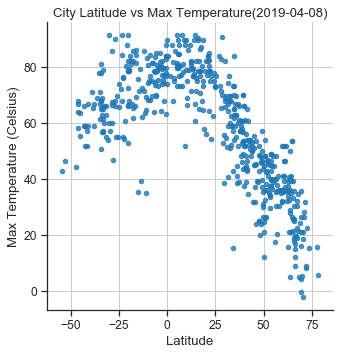

In [9]:
#Latitude vs. Temperature Plot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Max Temp',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title(f"City Latitude vs Max Temperature({datetime.now().date()})")
plt.show()

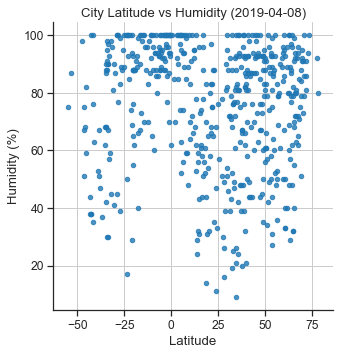

In [10]:
# Latitude vs. Humidity Plot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.show()

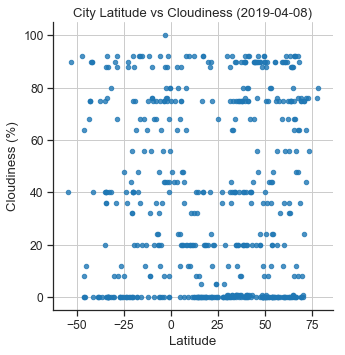

In [11]:
# Latitude vs. Cloudiness Plot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.show()


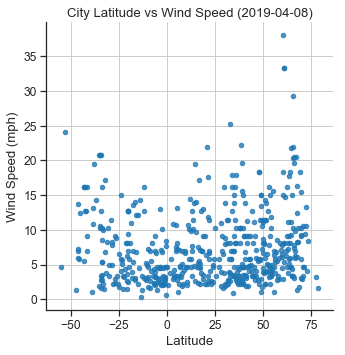

In [12]:
#Latitude vs. Wind Speed Plot


sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.show()
